In [1]:
import pandas as pd
import numpy as np
import os

# Data Preparation / Collected Data

In [2]:
path = os.listdir('D:/Dokumen kuliah/[KULIAH] PELAJAAN BINA NUSANTARA/semester 4/Machine Learning/Latihan and Materi/Dataset/Dataset_Covid_Radiography/Training/')
label = {'COVID': 1 , 'Normal' : 0}

In [3]:
label

{'COVID': 1, 'Normal': 0}

In [55]:
import cv2

In [56]:
x = list()
y = list()

In [57]:
from tqdm.auto import tqdm

In [58]:
for clasess in label:
    pth = 'D:/Dokumen kuliah/[KULIAH] PELAJAAN BINA NUSANTARA/semester 4/Machine Learning/Latihan and Materi/Dataset/Dataset_Covid_Radiography/Training/' + clasess
    for j in tqdm(os.listdir(pth)):
        image = cv2.imread(pth + '/' + j, 0)
        image = cv2.resize(image, (128, 128))
        image_gray = cv2.cvtColor(image, cv2.COLOR_BAYER_BG2RGB)
        x.append(image_gray)
        y.append(label[clasess])
        print("Loading: ... ",end='\r' )

  0%|          | 0/3616 [00:00<?, ?it/s]

  0%|          | 0/10192 [00:00<?, ?it/s]

In [59]:
np.unique(y)

array([0, 1])

In [60]:
# convert to array
x = np.array(x)
y = np.array(y)

In [61]:
# check count data
pd.Series(y).value_counts()

0    10192
1     3616
dtype: int64

In [62]:
# view shape
print("x shape: " ,x.shape)
print("y shape: " ,y.shape)

x shape:  (13808, 128, 128, 3)
y shape:  (13808,)


# Visualize Data

In [63]:
import matplotlib.pyplot as plt

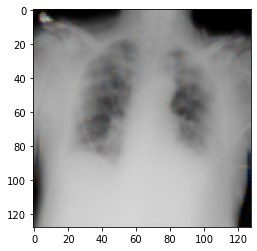

In [64]:
plt.imshow(x[0])

# Reshape Data

In [65]:
x_new = x.reshape(len(x), -1)
x_new.shape

(13808, 49152)

# Split Data

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2, random_state=0)

In [68]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(11046, 49152)
(2762, 49152)
(11046,)
(2762,)


# Test Algorithm

In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.neural_network import MLPClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier

In [ ]:
# model = []

In [ ]:
# model.append(('Logistic Reggression', LogisticRegression()))
# model.append(('SVM', SVC(gamma='auto')))
# model.append(('neural network', MLPClassifier()))
# model.append(('KNN', KNeighborsClassifier()))
# model.append(('Random Forest', RandomForestClassifier()))

In [ ]:
# evaluate models for train
# results = []
# names = []

In [ ]:
# from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_val_score

In [ ]:
# import warnings
# warnings.filterwarnings('ignore')

# for names_model, models in tqdm(model):
#     Kfold = KFold(n_splits = 10, shuffle = True, random_state = 0)
#     models_result = cross_val_score(models, x_train, y_train, cv = Kfold)
#     print("Loading: ... ",end='\r' )
#     results.append(models_result)
#     names.append(names_model)
#     print('%s: %f' % (names_model, models_result.mean()))

# Train Model

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
model = LogisticRegression(C=0.1, solver='liblinear')

In [71]:
import warnings
warnings.filterwarnings('ignore')

model.fit(x_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [ ]:
# SVM terlalu lama melakukan training
# from sklearn.svm import SVC

In [ ]:
# model_SVM = SVC(gamma='auto')

In [ ]:
# model_SVM.fit(x_train, y_train)

# Evaluation

In [72]:
print('Train Score: ', model.score(x_train, y_train))
print('Test  Score: ', model.score(x_test, y_test))

Train Score:  1.0
Test  Score:  0.8414192614047792


# Prediction Data

In [73]:
pred = model.predict(x_test)
for i in tqdm(pred):
    print("Loading: ... ",end='\r' )

  0%|          | 0/2762 [00:00<?, ?it/s]

In [74]:
# prediksi yang meleset
np.where(pred != y_test)

(array([   7,   19,   24,   29,   33,   44,   46,   61,   65,   73,   81,
          84,   89,   91,   99,  109,  114,  116,  131,  136,  140,  148,
         161,  170,  173,  177,  183,  188,  199,  208,  213,  224,  226,
         228,  240,  245,  248,  249,  252,  254,  265,  268,  278,  282,
         287,  296,  305,  309,  334,  336,  337,  338,  341,  358,  365,
         377,  382,  386,  387,  388,  393,  403,  405,  406,  408,  409,
         415,  421,  426,  427,  444,  448,  449,  451,  473,  487,  492,
         496,  498,  501,  508,  514,  515,  517,  518,  527,  529,  533,
         535,  537,  543,  544,  546,  566,  567,  571,  573,  575,  581,
         588,  595,  601,  602,  604,  607,  614,  615,  633,  647,  652,
         655,  658,  666,  680,  688,  691,  692,  698,  703,  705,  713,
         714,  716,  722,  726,  730,  736,  743,  750,  759,  769,  770,
         788,  791,  794,  798,  804,  817,  820,  824,  829,  846,  850,
         851,  857,  863,  869,  873, 

# Evaluation Predict Data

In [75]:
from sklearn.metrics import accuracy_score

In [76]:
accuracy_score(y_test, pred)

0.8414192614047792

# Make Model Test

In [77]:
label_pred = {1: 'Covid' , 0: 'Normal' }

  0%|          | 0/9 [00:00<?, ?it/s]

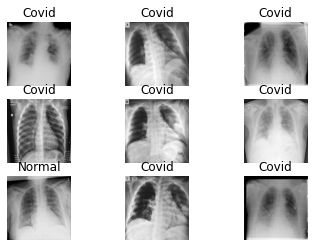

In [78]:
path_data = 'D:\Dokumen kuliah/[KULIAH] PELAJAAN BINA NUSANTARA/semester 4/Machine Learning/Latihan and Materi/Dataset/Dataset_Covid_Radiography/Data Test Covid/'
c = 1
for i in tqdm(os.listdir(path_data + '/Covid/')):
    plt.subplot(3, 3, c)
    img = cv2.imread(path_data + '/Covid/' + i, 0)
    image_gray = cv2.cvtColor(img, cv2.COLOR_BAYER_BG2RGB) 
    img1 = cv2.resize(image_gray, (128,128))
    img1 = img1.reshape(1, -1)
    predicted = model.predict(img1)
    plt.title(label_pred[predicted[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    print("Loading: ... ",end='\r' )
    c += 1

  0%|          | 0/9 [00:00<?, ?it/s]

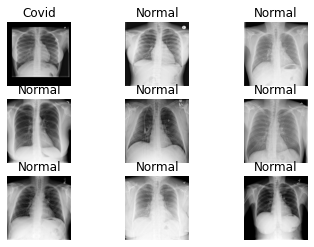

In [79]:
import warnings
warnings.filterwarnings('ignore')

path_data = 'D:\Dokumen kuliah/[KULIAH] PELAJAAN BINA NUSANTARA/semester 4/Machine Learning/Latihan and Materi/Dataset/Dataset_Covid_Radiography/Data Test Covid/'
c = 1
for i in tqdm(os.listdir(path_data + '/Normal/')):
    plt.subplot(3, 3, c)
    img = cv2.imread(path_data + '/Normal/' + i, 0)
    image_gray = cv2.cvtColor(img, cv2.COLOR_BAYER_BG2RGB) 
    img1 = cv2.resize(image_gray, (128,128))
    img1 = img1.reshape(1, -1)
    predicted = model.predict(img1)
    plt.title(label_pred[predicted[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    print("Loading: ... ",end='\r' )
    c += 1

# Save Model

In [80]:
import joblib 

In [81]:
with open('Model_Learning_Covid', 'wb') as file:
    joblib.dump(model, file)

In [82]:
with open('Model_Learning_Covid', 'rb') as file:
    mdl = joblib.load(file)

In [83]:
mdl.score(x_test, y_test)

0.8414192614047792